**#Analyzing tabular data using python and Pandas**

*Pandas is a powerful, open-source Python library for data manipulation and analysis, providing fast, flexible, and expressive data structures like DataFrames (tables) and Series (columns) to handle structured data easily*.
### It's essential for cleaning, exploring, transforming, and analyzing datasets, supporting efficient operations on tabular and time-series data, making it a fundamental tool in data science. The name comes from "Panel Data" and "Python Data Analysis".


##Sumary
*Pandas acts as a versatile, high-level tool for practical data analysis in Python, simplifying complex data tasks and providing an intuitive way to work with real-world datasets.*


In [ ]:
import pandas as pd

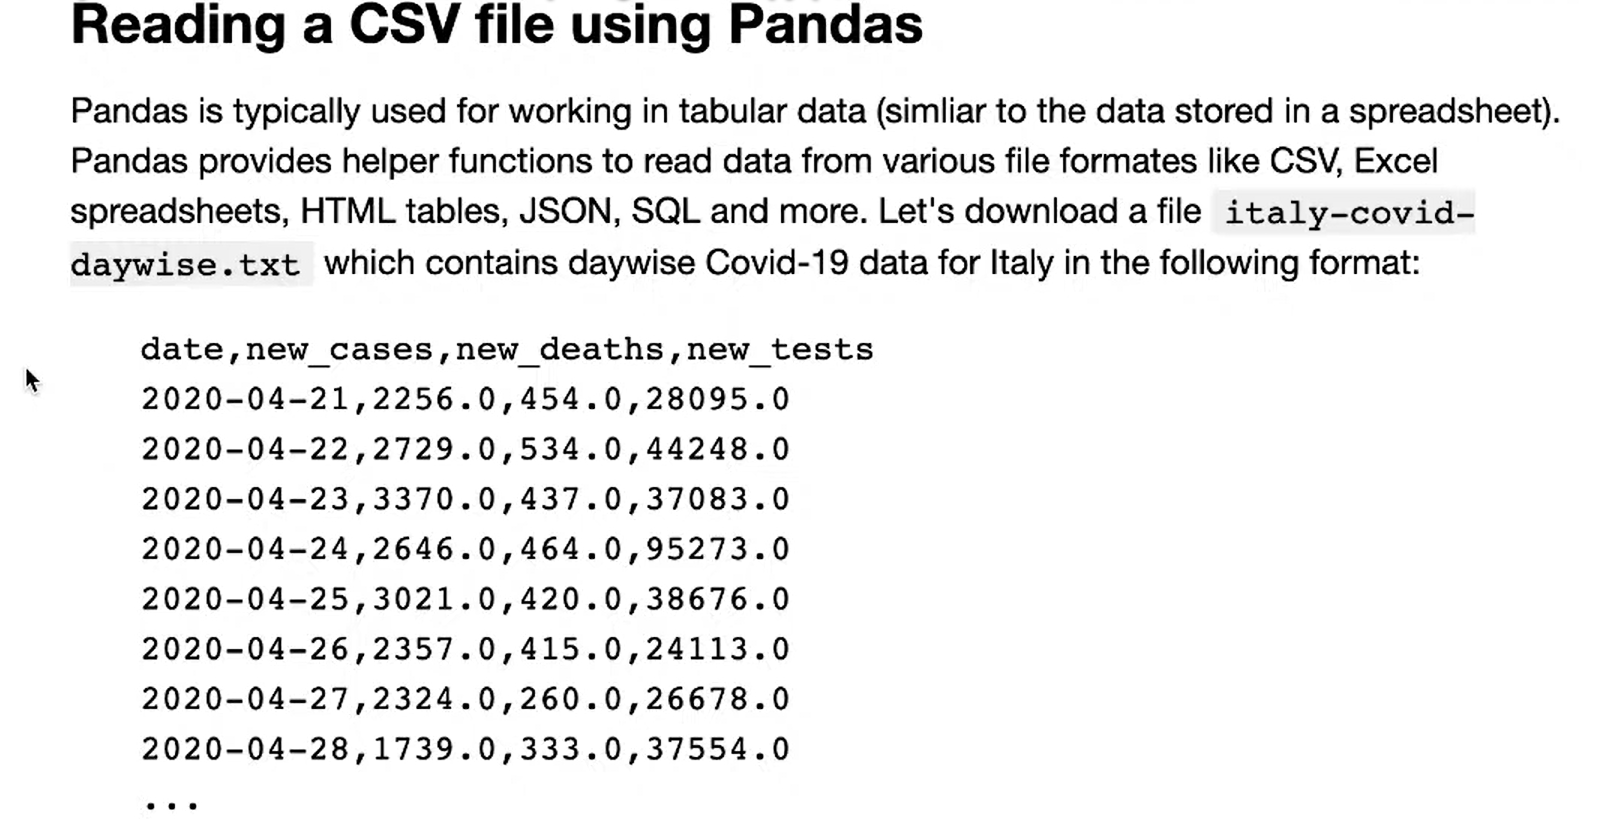

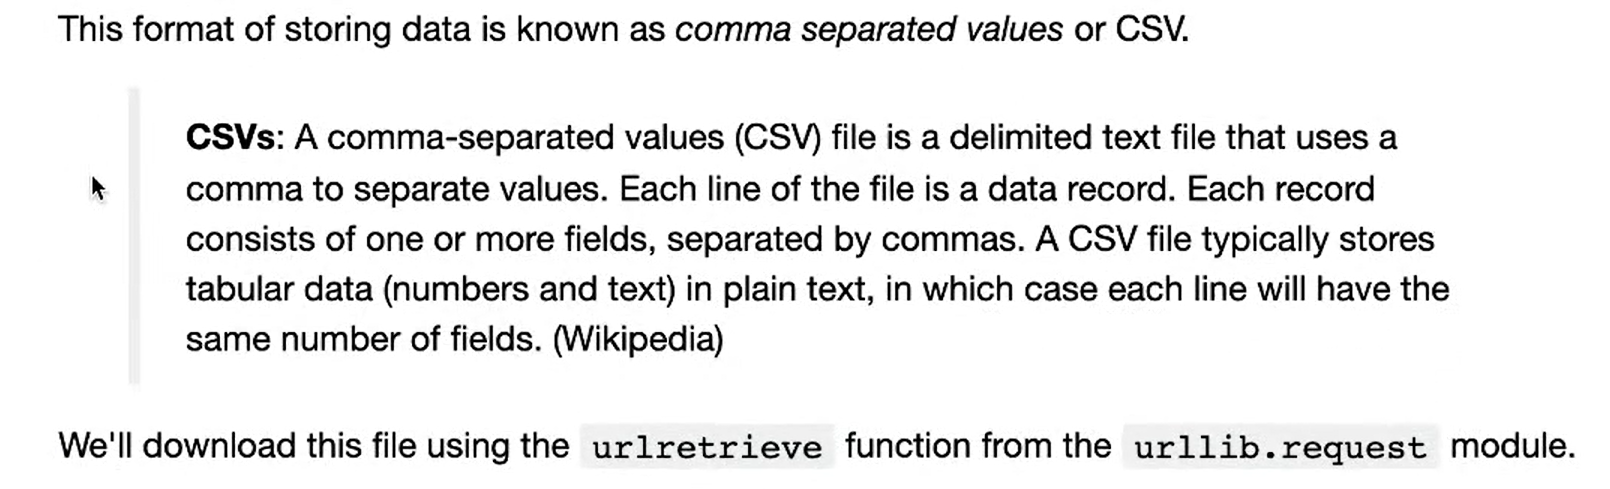




In [ ]:
from urllib.request import urlretrieve

**Here in the next section we are going to retreive the data of the italy day wise covid analysis by means of the url.**


In [ ]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv') #trying to retrive the csv file attachted to the url

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7cbda9eca840>)

In [ ]:
covid_df=pd.read_csv('italy-covid-daywise.csv') #pandas reading csv file

DATA from the files is read and stored in a dataframe object -one of the core data structure in pandas for sorting and working with tabular data.We typically use the _df suffix ib the variable names for dataframe.

In [ ]:
type(covid_df) #Tying to check the type of the data

pandas.core.frame.DataFrame

In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [ ]:
covid_df.head(3) #Looking for just top 3 item

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN


In [ ]:
covid_df.tail(3) #looking for only bottom 3 item

,date,new_cases,new_deaths,new_tests
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


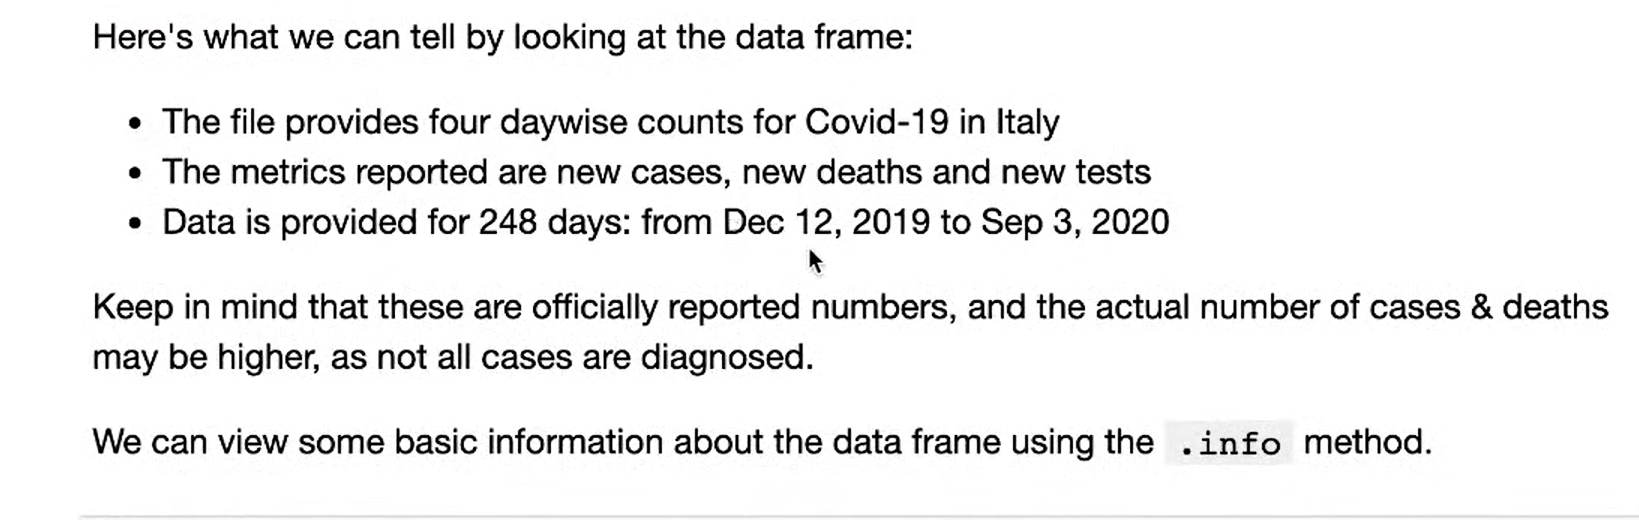

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


it appears that each column contains values of a specific data type .For the numeric columns ,you can view the some staticals information like mean standard deviation ,minimum /maximum values and numbers of non empty values using the .describe  method.


In [ ]:
covid_df.describe() #it is for just looking at it and telling that whether the data is correct or we need to clean the data

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The 'colums' proparly contains within the data  frame

In [ ]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

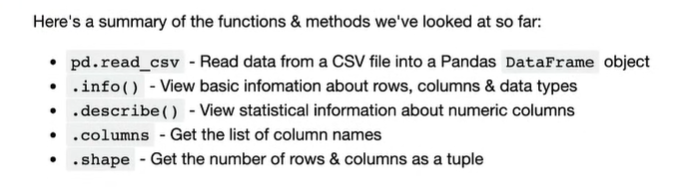

**#Retrieving data from a data frame**


The first thing you might want to do is to retrieve data from this data frame e.g. the counts of a specific day or the list of values in a specific column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: the keys are column names, and the values are lists/arrays containing data for the respective columns.

In [ ]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Representing data in the above format has a few benefits:

1.All values in a column typically have the same type of value, so it's more efficient to store them in a single array.


2.Retrieving the values for a particular row simply requires extracting the elements at a given index from each of the column arrays.


3.The representation is more compact (column names are recorded only once) compared to other formats where you might use a dictionary for each row of data (example shown below).

In [ ]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]


With the dictionary of lists analogy in mind, we can now guess how we might be able to retrieve data from a data frame. for example, we can get a list of values from a specific column using the [] indexing notation.

In [ ]:
covid_data_dict['new_cases']


[1444, 1365, 996, 975, 1326]

In [ ]:
covid_df['new_cases']

,new_cases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
243,1444.0
244,1365.0
245,996.0
246,975.0


Each column is represemted uding data structure called series,which is essentially a numpy array with some extra methods and properties.


In [ ]:
type(covid_df['new_cases'])

pandas.core.series.Series

Just likearrays ,you can retrive  a specific value with a series using the indexing notation [].



In [ ]:
covid_df['new_cases'][246]

np.float64(975.0)

In [ ]:
covid_df['new_tests'][240]

np.float64(57640.0)

pandas  also provides the .at method to directly retrive at specific row & column.

In [ ]:
covid_df.at[246,'new_cases']

np.float64(975.0)

In [ ]:
covid_df.at[240,'new_tests']

np.float64(57640.0)

*Instead of using the indexing notation [], Pandas also allows accessing columns as properties of the dataframe using the . notation. However, this method only works for columns whose names do not contain spaces or special characters.*

In [ ]:
#same as covid _df['new_cases']
covid_df.new_cases

,new_cases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
243,1444.0
244,1365.0
245,996.0
246,975.0


Further, you can also pass a list of columns within the indexing notation [] to access a subset of the data frame with just the given columns.

In [ ]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0



The new data frame cases_df is simply a "view" of the original data frame covid_df. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.

*Sometimes you might need a full copy of the data frame, in which case you can use the copy method.*

In [ ]:
covid_df_copy=covid_df.copy()

The data within covid_df_copy is completely separate from covid_df, and changing values inside one of them will not affect the other.

*To access a specific row of data, Pandas provides the .loc method.*

In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [ ]:
covid_df.loc[243]

,243
date,2020-08-30
new_cases,1444.0
new_deaths,1.0
new_tests,53541.0


Each retrived row is also a series object

In [ ]:
type(covid_df.loc[243])

pandas.core.series.Series


We can use the .head and .tail methods to view the first or last few rows of data.

In [ ]:
covid_df.head(5)


,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [ ]:

covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN



Notice above that while the first few values in the new_cases and new_deaths columns are 0, the corresponding values within the new_tests column are NaN. That is because the CSV file does not contain any data for the new_tests column for specific dates (you can verify this by looking into the file). These values may be missing or unknown.

In [ ]:
covid_df.at[0, 'new_tests']

np.float64(nan)

In [ ]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

The distinction between 0 and NaN is subtle but important. In this dataset, it represents that daily test numbers were not reported on specific dates. Italy started reporting daily tests on Apr 19, 2020. 93,5310 tests had already been conducted before Apr 19.

We can find the first index that doesn't contain a NaN value using a column's first_valid_index method.

In [ ]:
covid_df.new_tests.first_valid_index()

111


Let's look at a few rows before and after this index to verify that the values change from NaN to actual numbers. We can do this by passing a range to loc.

In [ ]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0



We can use the .sample method to retrieve a random sample of rows from the data frame.

In [ ]:

covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
215,2020-08-02,295.0,5.0,24496.0
101,2020-04-10,4204.0,612.0,NaN
43,2020-02-12,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
141,2020-05-20,813.0,162.0,38617.0
221,2020-08-08,552.0,3.0,26631.0
98,2020-04-07,3599.0,636.0,NaN
124,2020-05-03,1900.0,474.0,27047.0
131,2020-05-10,1083.0,194.0,31384.0
29,2020-01-29,0.0,0.0,NaN


Notice that even though we have taken a random sample, each row's original index is preserved - this is a useful property of data frames.


*Here's a summary of the functions & methods we looked at in this section:*


*covid_df['new_cases'] - Retrieving columns as a Series using the column name

*new_cases[243] - Retrieving values from a Series using an index
covid_df.at[243, 'new_cases'] - Retrieving a single value from a data frame

*covid_df.copy() - Creating a deep copy of a data frame


*covid_df.loc[243] - Retrieving a row or range of rows of data from the data frame

*head, tail, and sample - Retrieving multiple rows of data from the data frame

*covid_df.new_tests.first_valid_index - Finding the first non-empty index in a series


**#Analyzing data from data frames**


Let's try to answer some questions about our data.

**Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?**

Similar to Numpy arrays, a Pandas series supports the sum method to answer these questions.

In [ ]:

total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [ ]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))


The number of reported cases is 271515 and the number of reported deaths is 35497.


**Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [ ]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()


In [ ]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))


The overall reported death rate in Italy is 13.07 %.


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**

In [ ]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [ ]:
total_tests

np.float64(5214766.0)

**Q: What fraction of tests returned a positive result?**

In [ ]:
positive_rate = total_cases / total_tests

In [ ]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))


5.21% of tests in Italy led to a positive diagnosis.



#Querying and sorting rows


Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion

In [ ]:
high_new_cases = covid_df.new_cases > 1000


In [ ]:
high_new_cases

,new_cases
0,False
1,False
2,False
3,False
4,False
...,...
243,True
244,True
245,False
246,False


The boolean expression returns a series containing True and False boolean values. You can use this series to select a subset of rows from the original dataframe, corresponding to the True values in the series.

In [ ]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [ ]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0



We can write this succinctly on a single line by passing the boolean expression as an index to the data frame.

In [ ]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [ ]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0



The data frame contains 72 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. We can change some display options to view all the rows.

In [ ]:

from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN



We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall positive_rate.

In [ ]:
positive_rate


np.float64(0.05206657403227681)

In [ ]:
help(positive_rate)

Help on float64 object:

class float64(floating, builtins.float)
 |  float64(x=0, /)
 |
 |  Double-precision floating-point number type, compatible with Python
 |  :class:`float` and C ``double``.
 |
 |  :Character code: ``'d'``
 |  :Canonical name: `numpy.double`
 |  :Alias on this platform (Linux x86_64): `numpy.float64`: 64-bit precision floating-point number type: sign bit, 11 bits exponent, 52 bits mantissa.
 |
 |  Method resolution order:
 |      float64
 |      floating
 |      inexact
 |      number
 |      generic
 |      builtins.float
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __abs__(self, /)
 |      abs(self)
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __bool__(self, /)
 |      True if self else False
 |
 |  __buffer__(self, flags, /)
 |      Return a buffer object that exposes the underlying memory of the object.
 |
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |
 |  __eq__(self, value, /)
 |      Return self==va

In [ ]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]


In [ ]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


The result of performing an operation on two columns is a new series.

In [ ]:
covid_df.new_cases / covid_df.new_tests

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
243,0.026970
244,0.032055
245,0.018311
246,NaN


We can use this series to add a new column to the data frame.

In [ ]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests


In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN



However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this positive_rate column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the positive_rate column using the drop method.

In [ ]:
covid_df.drop(columns=['positive_rate'], inplace=True)


Can you figure the purpose of the inplace argument?


#Sorting rows using column values
The rows can also be sorted by a specific column using .sort_values. Let's sort to identify the days with the highest number of cases, then chain it with the head method to list just the first ten results.

In [ ]:
covid_df.sort_values('new_cases', ascending=False).head(10)


,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


*It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.*

In [ ]:
covid_df.sort_values('new_deaths', ascending=False).head(10)


,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN



It appears that daily deaths hit a peak just about a week after the peak in daily new cases.

Let's also look at the days with the least number of cases. We might expect to see the first few days of the year on this list.

In [ ]:
covid_df.sort_values('new_cases').head(10)


,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN



It seems like the count of new cases on Jun 20, 2020, was -148, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at some days before and after Jun 20, 2020.

In [ ]:

covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0



For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:

1.Replace it with 0.

2.Replace it with the average of the entire column

3.Replace it with the average of the values on the previous & next date

4.Discard the row entirely
Which approach you pick requires some context about the data and the problem. In this case, since we are dealing with data ordered by date, we can go ahead with the third approach.

You can use the .at method to modify a specific value within the dataframe.

In [ ]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2


In [ ]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


Here's a **summary** of the functions & methods we looked at in this section:

**covid_df.new_cases.sum()**- Computing the sum of values in a column or series

**covid_df[covid_df.new_cases > 1000]** - Querying a subset of rows satisfying the chosen criteria using boolean expressions


**df['pos_rate'] = df.new_cases/df.new_tests**- Adding new columns by combining data from existing columns

**covid_df.drop('positive_rate')**- Removing one or more columns from the data frame

**sort_values** - Sorting the rows of a data frame using column values

**covid_df.at[172, 'new_cases']**= ... - Replacing a value within the data frame

#**Working with dates**


While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The date column might come in handy here, as Pandas provides many utilities for working with dates.

In [ ]:
covid_df.date


,date
0,2019-12-31
1,2020-01-01
2,2020-01-02
3,2020-01-03
4,2020-01-04
...,...
243,2020-08-30
244,2020-08-31
245,2020-09-01
246,2020-09-02


The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the ***pd.to_datetime*** method.

In [ ]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [ ]:
covid_df['date']

,date
0,2019-12-31
1,2020-01-01
2,2020-01-02
3,2020-01-03
4,2020-01-04
...,...
243,2020-08-30
244,2020-08-31
245,2020-09-01
246,2020-09-02



You can see that it now has the datatype datetime64. We can now extract different parts of the data into separate columns, using the DatetimeIndex class (view docs).

In [ ]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2



Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the sum method to aggregate each selected column's values.

In [ ]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may



,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [ ]:
# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [ ]:
#get the columun_wise sum
covid_may_totals=covid_df_may_metrics.sum()

In [ ]:
covid_may_totals


,0
new_cases,29073.0
new_deaths,5658.0
new_tests,1078720.0


In [ ]:

type(covid_may_totals)

pandas.core.series.Series


We can also combine the above operations into a single statement

In [ ]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()


,0
new_cases,29073.0
new_deaths,5658.0
new_tests,1078720.0



As another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate columns using the .mean method.

In [ ]:
# Overall average
covid_df.new_cases.mean()

np.float64(1096.6149193548388)

In [ ]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

np.float64(1247.2571428571428)


***It seems like more cases were reported on Sundays compared to other days.***


#**Grouping and aggregation**

As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the **groupby** function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the sum method.

In [ ]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()


In [ ]:

covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [ ]:
covid_month_df.loc[4]

,4
new_cases,101852.0
new_deaths,16091.0
new_tests,419591.0



The result is a new data frame that uses unique values from the column passed to groupby as the index. Grouping and aggregation is a powerful method for progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean. Let's compute the average number of daily new cases, deaths, and tests for each month.

In [ ]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()


In [ ]:
covid_month_mean_df


,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000



Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the cumsum method to compute the cumulative sum of a column as a new series. Let's add three new columns: total_cases, total_deaths, and total_tests.

In [ ]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()


In [ ]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()


In [ ]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests


We've also included the initial test count in total_test to account for tests conducted before daily reporting was started.

In [ ]:

covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


#**Merging data from multiple sources**
To determine other metrics like test per million, cases per million etc. we require more some information about the country viz. it's population. Let's download another file locations.csv which contains health-related information for different countries around the world, including Italy

In [ ]:
import urllib.request
urlretrieve('https://gist.githubusercontent.com/raun1997/9c319461d47fc2e3c6c883ca6cd84267/raw/5499273bcdbfccc33f755957129002b3d364d4b8/locations.csv')

('/tmp/tmp1g2josgm', <http.client.HTTPMessage at 0x7cbda83366f0>)

In [ ]:
import pandas as pd

locations_df=pd.read_csv('https://gist.githubusercontent.com/raun1997/9c319461d47fc2e3c6c883ca6cd84267/raw/5499273bcdbfccc33f755957129002b3d364d4b8/locations.csv')

In [ ]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [ ]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [ ]:
locations_df[locations_df.location == 'India']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
90,India,Asia,1.380004e+09,69.66,0.53,6426.674


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. So let's insert a location column in the covid_df dataframe with all values set to "Italy".

In [ ]:
covid_df['location'] = "Italy"

In [ ]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


**We can now add the columns from locations_df into covid_df using the .merge method.**

In [ ]:
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084



The location data for Italy is appended to each row within covid_df. If the covid_df data frame contained data for multiple locations, then the location-replaced data for the respective country would be appended for each row.

We can now calculate metrics like cases per million, deaths per million and tests per million.

In [ ]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population


In [ ]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population


In [ ]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population


In [ ]:
merged_df


,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN



**Writing data back to files**


After doing some analysis and adding new columns to the data frame, it would be a good idea to write the results back to a file, otherwise the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing the specific set of columns that we want to write into the file.

In [ ]:
result_df = merged_df[['date',
                       'new_cases',
                       'total_cases',
                       'new_deaths',
                       'total_deaths',
                       'new_tests',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]

In [ ]:

result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN



To write the data from the data frame into a file, we can use the to_csv function.

In [ ]:

result_df.to_csv('results.csv', index=None)


The to_csv function also includes an additional column for storing the index of the dataframe by deault. We pass index=None to turn off this behavior. You can now verify that the results.csv is created and contains data from the data frame in CSV format:

date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million


2020-02-
27,78.0,400.0,1.0,12.0,,,6.61574439992122,0.1984723319976366,
2020-02-
28,250.0,650.0,5.0,17.0,,,10.750584649871982,0.28116913699665186,
2020-02-
29,238.0,888.0,4.0,21.0,,,14.686952567825108,0.34732658099586405,
2020-03-
01,240.0,1128.0,8.0,29.0,,,18.656399207777838,0.47964146899428844,
2020-03-
02,561.0,1689.0,6.0,35.0,,,27.93498072866735,0.5788776349931067,
2020-03-
03,347.0,2036.0,17.0,52.0,,,33.67413899559901,0.8600467719897585,

#**Bonus: Basic Plotting with Pandas**

While we typically use a library like matplotlib or seaborn plot graphs with a Juptyer notebook, Pandas data frames & series also provide a handy .plot method for quick and easy plotting.

Let's plot line graph showing how the no. of daily cases varies over time using the plot method of a Pandas series.

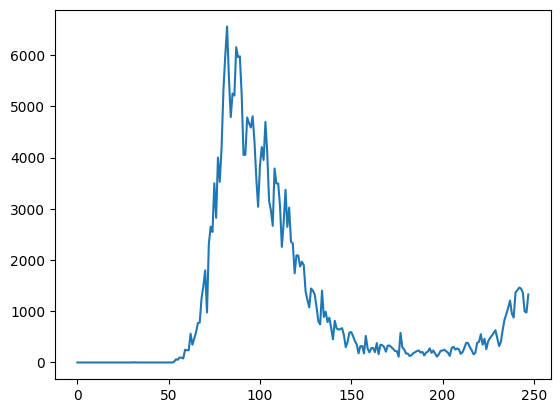

In [ ]:
result_df.new_cases.plot();


While this plot shows the overall trend, it's hard to tell where the peak occured, as there are no dates on the X axis. We can use the date column as the index for the data frame to address this issue.

In [ ]:
result_df.set_index('date', inplace=True)

In [ ]:

result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


That's right, the index of a data frame doesn't have to be numeric. Turn the date into the index also allows us to get the data for a specific data using .loc

In [ ]:

result_df.loc['2020-09-01']

,2020-09-01
new_cases,9.960000e+02
total_cases,2.696595e+05
new_deaths,6.000000e+00
total_deaths,3.548300e+04
new_tests,5.439500e+04
total_tests,5.214766e+06
cases_per_million,4.459996e+03
deaths_per_million,5.868661e+02
tests_per_million,8.624890e+04


Let's plot the new cases & new deaths per day as line graphs.

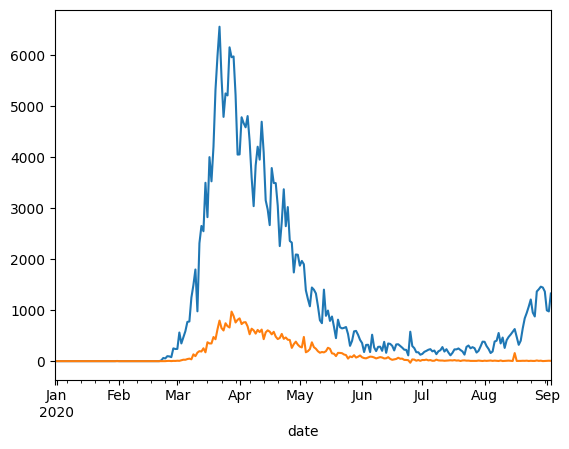

In [ ]:

result_df.new_cases.plot()
result_df.new_deaths.plot();

We can also compare the total cases vs. total deaths.

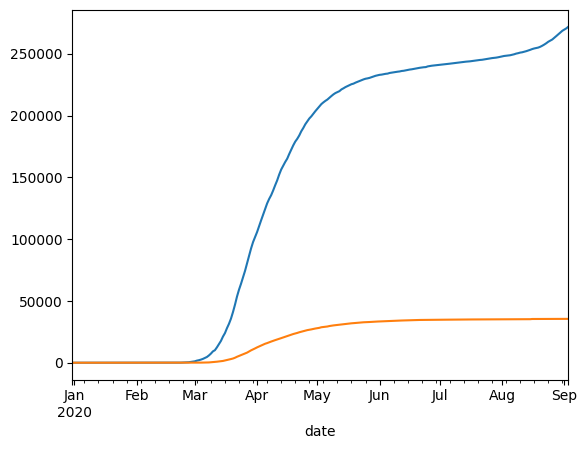

In [ ]:

result_df.total_cases.plot()
result_df.total_deaths.plot();


Let's see how the death rate and postive testing rates vary over time

In [ ]:
death_rate = result_df.total_deaths / result_df.total_cases


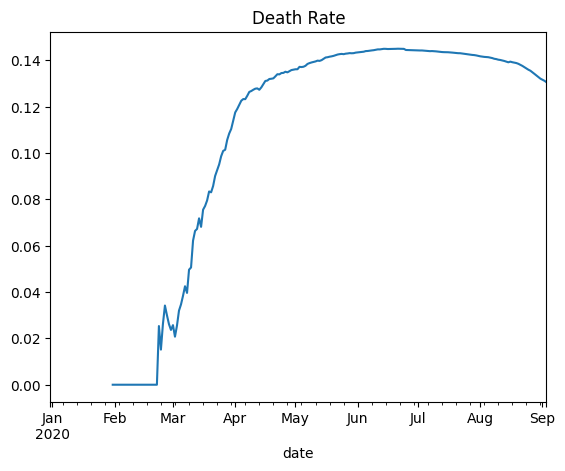

In [ ]:
death_rate.plot(title='Death Rate');


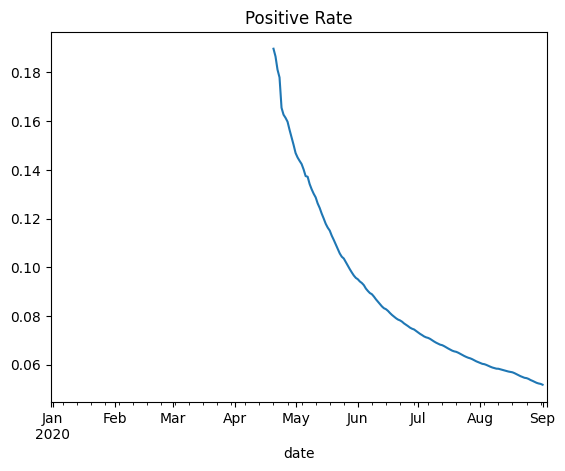

In [ ]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

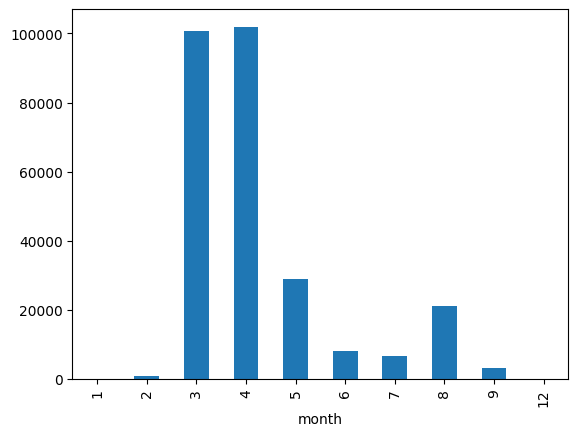

In [ ]:
covid_month_df.new_cases.plot(kind='bar');

<Axes: xlabel='month'>

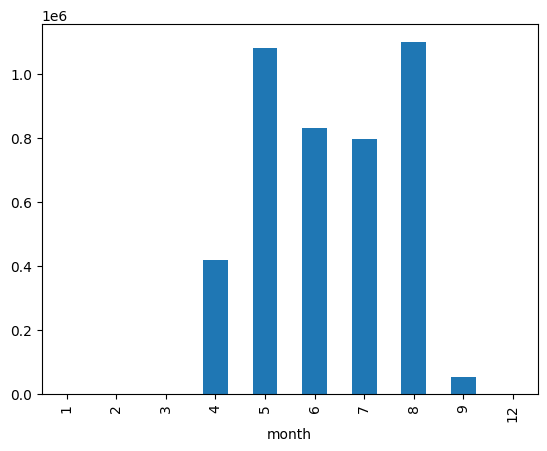

In [ ]:

covid_month_df.new_tests.plot(kind='bar')